In [186]:
#importing libraries
import numpy as np
import pandas as pd

In [187]:
#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
#reading the CSV file as a dataframe
df = pd.read_csv('911.csv')

In [189]:
#Checking the head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [190]:
# the "title" column is a bit messy, we'll simplify it to Reason
# we'll categorize it as EMS, Fire, and Traffic (macro causes)

# definig the function
def simpleReason(text):
    head, sep, tail = text.partition(':')
    return head

# creating a new column and applying the previous function to simplify the reason
df['Reason'] = df.title.apply(simpleReason)

# verifying it
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


<AxesSubplot:xlabel='Reason', ylabel='count'>

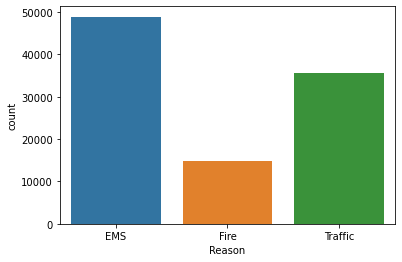

In [191]:
# using seaborn to create a countplot of 'Reason
sns.countplot(data=df, x='Reason')

In [192]:
# converting timeStamp to dateTime (instead of string)
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Creating 3 new columns Hour, Month, and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [193]:
# mapping days of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

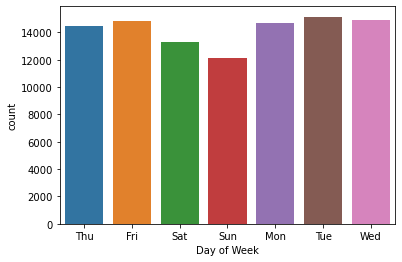

In [194]:
# using seaborn to create a countplot
# how many calls per day of teh week
sns.countplot(x='Day of Week', data=df)

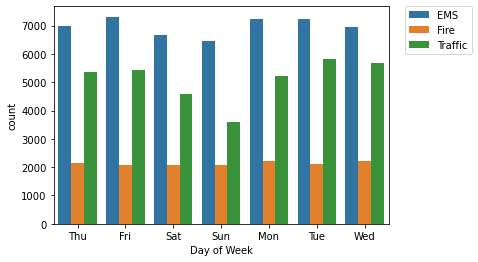

In [195]:
# how many calls per reason per day off the week
sns.countplot(x='Day of Week', hue='Reason', data=df)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

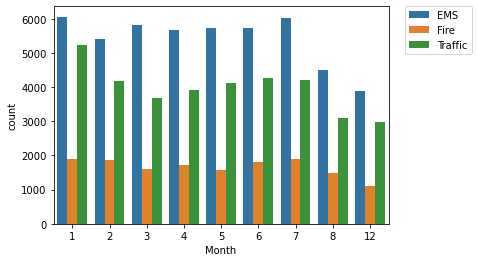

In [196]:
# how many calls per reason per month of the year
sns.countplot(x='Month', hue='Reason', data=df)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


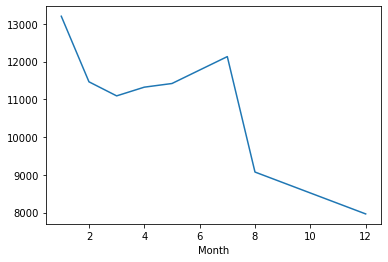

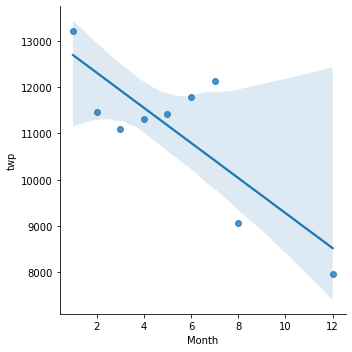

In [197]:
# the months 9, 10, and 11 are missing

# Grouping by month:
byMonth = df.groupby('Month').count()

# plotting the calls per month:
byMonth['twp'].plot()

# using lmplot to create a linear fit on the number of calls per month
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

# creating a new column 'Date' to include the fitted data
df['Date']=df['timeStamp'].apply(lambda t: t.date())

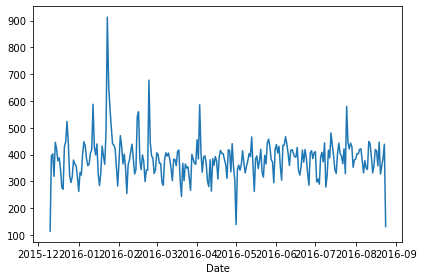

In [198]:
# plotting the # of calls per 'Date'
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

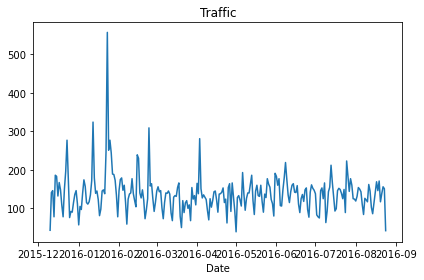

In [199]:
# creating the previous plot, but filtering by Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

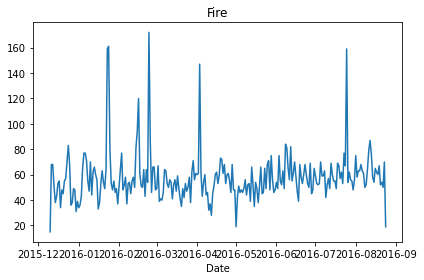

In [200]:
# creating the previous plot, but filtering by Fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()


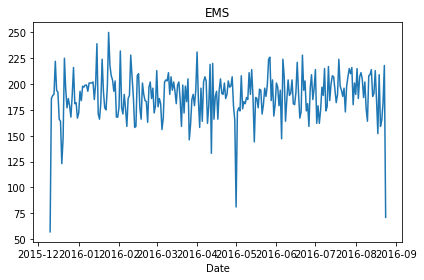

In [201]:
# creating the previous plot, but filtering by EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [202]:
# Restructuring df so that the columns are 'Hour' and Index is the Day of the Week
# the unstack method returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

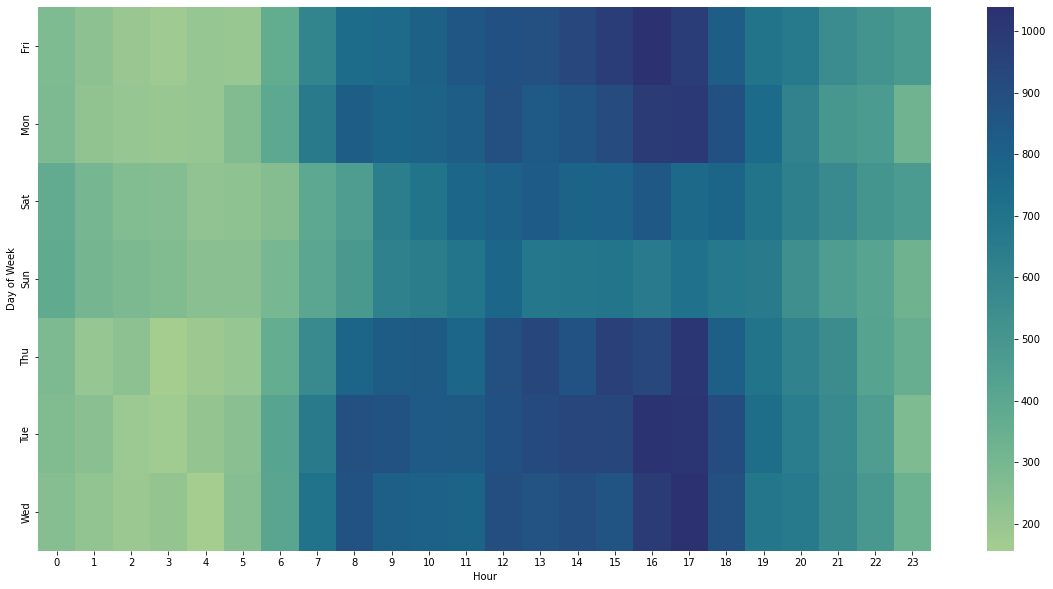

In [203]:
# Heatmaps!

# plotting a heatmap of the hour/day with more calls
plt.figure(figsize=(20,10))
sns.heatmap(dayHour, cmap='crest')

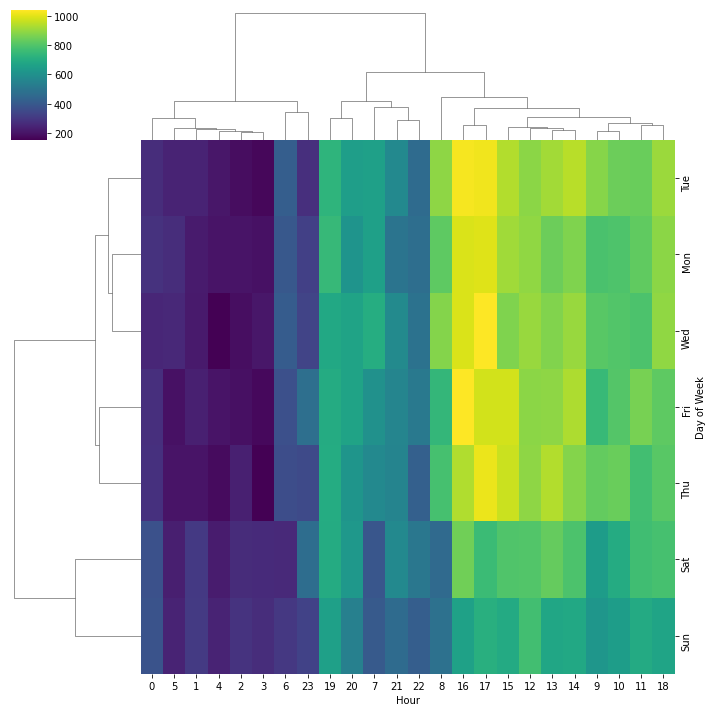

In [204]:
sns.clustermap(dayHour,cmap='viridis')

In [205]:
# setting up the ridgeline, importing plotly
import plotly.graph_objects as go

# List of days of week
daysInWeek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Grouping and counting calls per day and hour
calls = df.groupby(['Day of Week', 'Hour']).agg({'Hour': 'count'}).rename(columns={'Hour': 'count'}).reset_index()
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [214]:
# instantiating an empty dictionnary
array_dict = {} 

# When working with a ridgeline in Plotly, each trace correspond to a Day of week's count distribution
# We'll store each Day of Week's data (Hour with count per hour) in a separate array
for weekday in daysInWeek:
    # storing the temperature data for each year
    array_dict[f'x_{weekday}'] = calls[calls['Day of Week']==weekday]['Hour'] 
    # storing the temperature count for each year
    array_dict[f'y_{weekday}'] = calls[calls['Day of Week']==weekday]['count']
    # Normalizing the array (min max normalization)
    array_dict[f'y_{weekday}'] = (array_dict[f'y_{weekday}'] - array_dict[f'y_{weekday}'].min()) \
                                / (array_dict[f'y_{weekday}'].max() - array_dict[f'y_{weekday}'].min()) 




In [215]:
figRidge = go.Figure()
for index, weekday in enumerate(daysInWeek):
    figRidge.add_trace(go.Scatter(
                            x=[0, 23], y=np.full(2, len(daysInWeek)-index),
                            mode='lines',
                            line_color='white'))
    
    figRidge.add_trace(go.Scatter(
                            x=array_dict[f'x_{weekday}'],
                            y=array_dict[f'y_{weekday}'] + (len(daysInWeek)-index) + 0.4,
                            fill='tonexty',
                            name=f'{weekday}'))
    
    # plotly.graph_objects' way of adding text to a figure
    figRidge.add_annotation(
                        x=0,
                        y=len(daysInWeek)-index,
                        text=f'{weekday}',
                        showarrow=False,
                        yshift=10)

In [216]:
# here you can modify the figure and the legend titles
figRidge.update_layout(
                title='Normalized # of 911 calls per Hour and Weekday in Montgomery County, PA',
                showlegend=False,
                xaxis=dict(title='Time of day'),
                yaxis=dict(title='Day of Week', showticklabels=False) 
                )

figRidge.show()